# Visualizing data in 3-D reduced to 2-D

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

a = np.random.normal(14, 3, 100) 
b = np.random.normal(10, 3, 100)
x = (9*a) - (2*b)
y = (-7*a) - b
z = (5*a) - (12*b)
A1 = np.row_stack([x, y, z]) #places data into a matrix stacking each variable as a row
A1 = A1.T
df1 = pd.DataFrame(data= A1
                 , columns =['x','y','z'])

a2 = np.random.normal(-8, 3, 100) 
b2 = np.random.normal(-2, 3, 100)
x2 = (9*a2) - (2*b2)
y2 = (-7*a2) - b2
z2 = (5*a2) - (12*b2)
A2 = np.row_stack([x2, y2, z2]) #places data into a matrix stacking each variable as a row
A2 = A2.T
df2 = pd.DataFrame(data= A2
                 , columns =['x','y','z'])

a3 = np.random.normal(24, 3, 100) 
b3 = np.random.normal(17, 3, 100)
x3 = (9*a3) - (2*b3)
y3 = (-7*a3) - b3
z3 = (5*a3) - (12*b3)
A3 = np.row_stack([x3, y3, z3]) #places data into a matrix stacking each variable as a row
A3 = A3.T
df3 = pd.DataFrame(data= A3
                 , columns =['x','y','z'])


df = pd.concat([df1, df2, df3], axis = 0)

df.head(15)

,x,y,z
0,39.039269,-58.674013,-98.937320
1,71.617656,-91.258029,-111.709368
2,110.345812,-103.370409,-13.457514
3,68.179431,-75.928371,-59.696131
4,154.949762,-139.139325,6.733693
5,121.352043,-131.261485,-89.708426
6,62.989654,-82.189004,-106.454049
7,99.851509,-113.340219,-96.545960
8,84.903249,-88.770366,-49.700294
9,163.094057,-147.917580,0.845576


## Visualize Data in 3D

Populating the interactive namespace from numpy and matplotlib


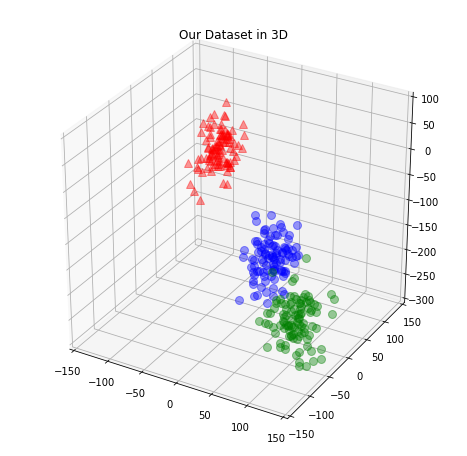

In [2]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.4)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.4)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.4)

#adjust axes ranges based on each data set
ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Our Dataset in 3D')
plt.show()

# Standardize Data

In [3]:
features = ['x', 'y', 'z']

# Separating out the features
data_pts = df.loc[:, features].values #df.loc accesses a group of rows or columns

# Standardizing the features by subtracting the mean
mean_vec = np.mean(data_pts, axis=0) #creating vector of means
std_data_pts = data_pts - mean_vec #subtracting the means and normalizing

pd.DataFrame(data = std_data_pts, columns = features).head(15)

,x,y,z
0,-34.927550,20.706077,-46.928539
1,-2.349163,-11.877938,-59.700587
2,36.378993,-23.990318,38.551267
3,-5.787388,3.451720,-7.687350
4,80.982943,-59.759235,58.742474
5,47.385224,-51.881395,-37.699645
6,-10.977165,-2.808913,-54.445268
7,25.884690,-33.960128,-44.537179
8,10.936430,-9.390276,2.308487
9,89.127238,-68.537489,52.854357


## Find Covariance Matrix

In [4]:
M = np.cov(std_data_pts.T)
print(M)
M.shape

[[ 11102.10020156 -10630.204288    -2333.61314284]
 [-10630.204288    10281.89151136   2675.52984698]
 [ -2333.61314284   2675.52984698   2370.01544744]]


(3, 3)

## Find Eigenvalues and Eigenvectors

In [5]:
e, v = np.linalg.eig(M) 
# finds the eigenvalues and vectors and stores them separately into e and then v
print (e)
print (v)

[ 2.19684696e+04 -1.26863470e-12  1.78553753e+03]
[[-0.70740389  0.66237402  0.24665846]
 [ 0.6841261   0.72935566  0.00343483]
 [ 0.1776266  -0.17117531  0.96909639]]


## Sort Eigenvalues/vectors Largest to Smallest

In [6]:
idx = np.argsort(e)[::-1]
e = e[idx] #orders eigen values based on index of largest to smallest eigenvalues
e = np.real_if_close(e) #adjusts eigenvalues to be real numbers
v = v[:, idx]#adjusts the eigenvectors to correspond to eigenvalues
print(v)

[[-0.70740389  0.24665846  0.66237402]
 [ 0.6841261   0.00343483  0.72935566]
 [ 0.1776266   0.96909639 -0.17117531]]


## Plot with Eigenvectors

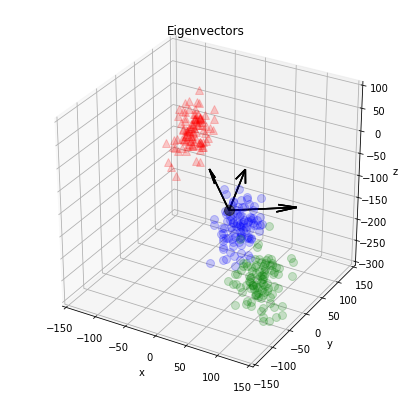

In [7]:
mean_x = np.mean(data_pts[:,0])
mean_y = np.mean(data_pts[:,1])
mean_z = np.mean(data_pts[:,2])
multiplier = np.matrix('100 0 0; 0 100 0; 0 0 100')
vec = v*multiplier

from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.2)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='black', alpha=0.5)

origin = [mean_x, mean_y, mean_z]
X, Y, Z = zip(origin, origin, origin) 
U, V, W = zip(vec[:,0], vec[:,1], vec[:,2])
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.3, color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Eigenvectors')
plt.show()


## Determine Amount of Variance and Select Principle Components

In [8]:
expvar = e/e.sum() #will give the percent of variance covered by each eigenvalue/vector
print(expvar) 

[ 9.24832155e-01  7.51678452e-02 -5.34071868e-17]


## Selecting PCs

In [9]:
nvar = 3 #number of variables
ncomp = 2 #number of components
remove = nvar-ncomp
e = e[0:-remove] #indexes from 0 to everything except for the remove indexes at the end
print(e)
v = v[:, :-remove] #all rows and all columns except the removed
print(v)
v.shape

[21968.46962841  1785.53753195]
[[-0.70740389  0.24665846]
 [ 0.6841261   0.00343483]
 [ 0.1776266   0.96909639]]


(3, 2)

## Plot PCs on Data

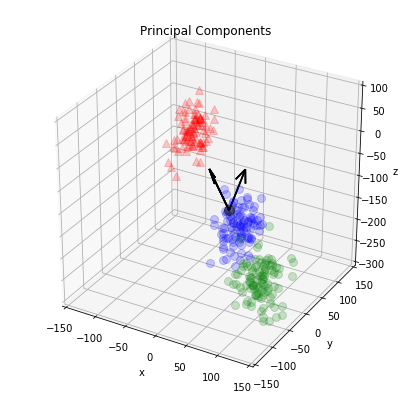

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.2)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='black', alpha=0.5)

origin = [mean_x, mean_y, mean_z]
X, Y, Z = zip(origin, origin, origin) 
U, V, W = zip(vec[:,0], vec[:,1], vec[:,0])
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.3, color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Principal Components')
plt.show()


## Dimension Reduction and Change of Basis for PCA
In this section we will perform matrix multiplication of the standardized data and the vectors of the principal components to get a new data matrix that will have n rows and m columns (where n= # of observations, and m= # of PCs)

In [11]:
PCdata = std_data_pts.dot(v)
PCdata.shape
principalDf = pd.DataFrame(data = PCdata
             , columns = ['PC 1', 'PC 2'])
principalDf.head(15)

,PC 1,PC 2
0,30.537696,-54.022332
1,-17.068613,-58.475862
2,-35.299313,46.250677
3,5.089955,-8.865435
4,-87.736275,76.696984
5,-75.710368,-25.024827
6,-3.827290,-55.479971
7,-49.454929,-36.892788
8,-13.750557,4.902455
9,-100.548900,72.969539


## Plot Data in Reduced Dimensions

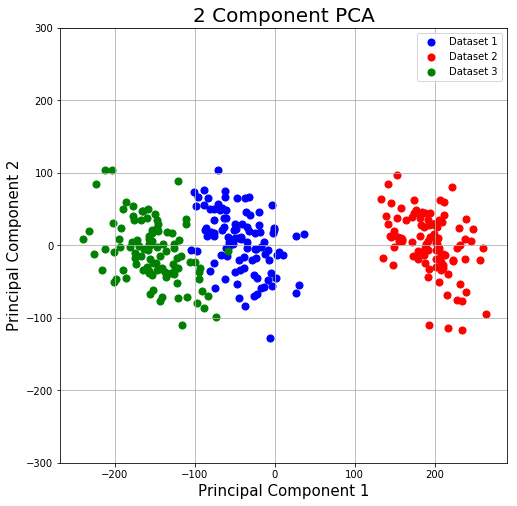

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf.loc[0:99, 'PC 1']
               , principalDf.loc[0:99, 'PC 2']
               , c = 'blue'
               , s = 50
               , label = 'Dataset 1')
ax.scatter(principalDf.loc[100:199, 'PC 1']
               , principalDf.loc[100:199, 'PC 2']
               , c = 'red'
               , s = 50
               , label = 'Dataset 2')
ax.scatter(principalDf.loc[200:300, 'PC 1']
               , principalDf.loc[200:300, 'PC 2']
               , c = 'green'
               , s = 50
               , label= 'Dataset 3')

#can use these lines of code to adjust axes ranges
#ax.set_xlim(-250,250) 
ax.set_ylim(-300,300) 

ax.legend()
ax.grid()

# Using SVD Instead

In [13]:
u, s, vh = np.linalg.svd(std_data_pts, full_matrices=True)
u.shape, s.shape, vh.shape
vh = vh.T
print(s)
print(vh)

[2.56292263e+03 7.30667997e+02 4.85015943e-13]
[[ 0.70740389 -0.24665846  0.66237402]
 [-0.6841261  -0.00343483  0.72935566]
 [-0.1776266  -0.96909639 -0.17117531]]


In [14]:
idx1 = np.argsort(s)[::-1]
vh1 = vh[:, idx1]#adjusts the order of eigenvectors to correspond to eigenvalues
vh1 = vh1[:, :-remove] #all rows and all columns except the removed
print(vh1)

[[ 0.70740389 -0.24665846]
 [-0.6841261  -0.00343483]
 [-0.1776266  -0.96909639]]


In [15]:
PCdata1 = std_data_pts.dot(vh1)
principalDf1 = pd.DataFrame(data = PCdata1
             , columns = ['PC 1', 'PC 2'])
principalDf1.head(15)

,PC 1,PC 2
0,-30.537696,54.022332
1,17.068613,58.475862
2,35.299313,-46.250677
3,-5.089955,8.865435
4,87.736275,-76.696984
5,75.710368,25.024827
6,3.827290,55.479971
7,49.454929,36.892788
8,13.750557,-4.902455
9,100.548900,-72.969539


## 3D Visualization of Eigenvectors

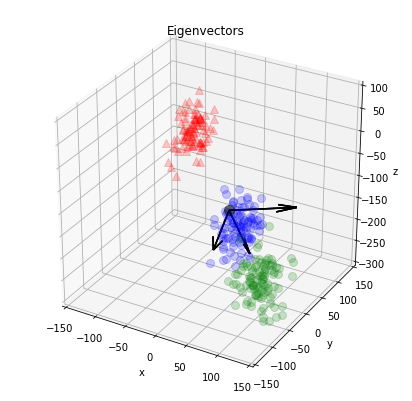

In [16]:
mean_x = np.mean(data_pts[:,0])
mean_y = np.mean(data_pts[:,1])
mean_z = np.mean(data_pts[:,2])
multiplier = np.matrix('100 0 0; 0 100 0; 0 0 100')
vec1 = vh*multiplier

from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.2)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='black', alpha=0.5)

origin = [mean_x, mean_y, mean_z]
X, Y, Z = zip(origin, origin, origin) 
U, V, W = zip(vec1[:,0], vec1[:,1], vec1[:,2])
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.3, color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Eigenvectors')
plt.show()



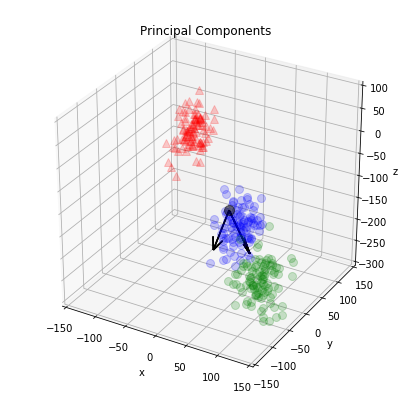

In [17]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(A1[:,0], A1[:,1], A1[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot(A2[:,0], A2[:,1], A2[:,2], '^', markersize=8, color='red', alpha=0.2)
ax.plot(A3[:,0], A3[:,1], A3[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='black', alpha=0.5)

origin = [mean_x, mean_y, mean_z]
X, Y, Z = zip(origin, origin, origin) 
U, V, W = zip(vec1[:,0], vec1[:,1], vec1[:,0])
ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.3, color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-150,150) 
ax.set_ylim(-150,150) 
ax.set_zlim(-300,100) 

plt.title('Principal Components')
plt.show()

Notice that one of the eigenvectors points in the opposite direction. It's the negative equivalent to the same eigenvector calculated from the covariance matrix, but the two PC's still capture all the data within the same plane.

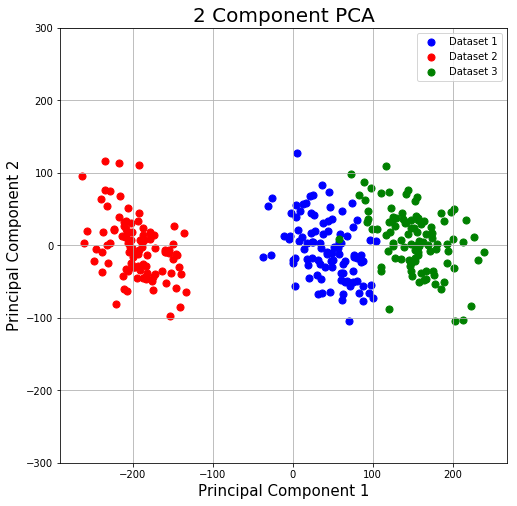

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf1.loc[0:99, 'PC 1']
               , principalDf1.loc[0:99, 'PC 2']
               , c = 'blue'
               , s = 50
               , label = 'Dataset 1')
ax.scatter(principalDf1.loc[100:199, 'PC 1']
               , principalDf1.loc[100:199, 'PC 2']
               , c = 'red'
               , s = 50
               , label = 'Dataset 2')
ax.scatter(principalDf1.loc[200:300, 'PC 1']
               , principalDf1.loc[200:300, 'PC 2']
               , c = 'green'
               , s = 50
               , label= 'Dataset 3')

#can use these lines of code to adjust axes ranges
#ax.set_xlim(-250,250) 
ax.set_ylim(-300,300) 

ax.legend()
ax.grid()